In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('AllTrails data - nationalpark.csv')

In [6]:
data.columns

Index(['trail_id', 'name', 'area_name', 'city_name', 'state_name',
       'country_name', '_geoloc', 'popularity', 'length', 'elevation_gain',
       'difficulty_rating', 'route_type', 'visitor_usage', 'avg_rating',
       'num_reviews', 'features', 'activities', 'units'],
      dtype='object')

In [8]:
data.isnull().sum()

trail_id               0
name                   0
area_name              0
city_name              0
state_name             0
country_name           0
_geoloc                0
popularity             0
length                 0
elevation_gain         0
difficulty_rating      0
route_type             0
visitor_usage        253
avg_rating             0
num_reviews            0
features               0
activities             0
units                  0
dtype: int64

In [9]:
data.drop(['visitor_usage'], axis=1, inplace=True)

In [73]:
f=pd.get_dummies(data['activities'])
   

Does the route type affect its popularity? 
Our data suggests that out and back is the most popular route type and the least is point to point.

In [108]:
data.groupby('route_type').apply(lambda x:x.sort_values(by='popularity', ascending=False).mean())

,trail_id,popularity,length,elevation_gain,difficulty_rating,avg_rating,num_reviews
route_type,,,,,,,
loop,1.019903e+07,8.932134,16181.491748,576.622995,2.979761,4.177553,68.244710
out and back,1.017097e+07,9.490831,13683.780644,550.218052,3.141658,4.161333,79.950682
point to point,1.022153e+07,5.824990,46540.101125,1408.744643,3.962500,4.228125,20.234375


In [77]:
data['state_name'].value_counts()

California        707
Washington        320
Wyoming           311
Utah              292
Colorado          262
Virginia          191
Maine             179
Tennessee         175
Arizona           174
Montana           151
North Carolina    118
Texas              94
Ohio               50
Hawaii             35
Florida            31
Alaska             29
Kentucky           28
Nevada             25
North Dakota       23
Oregon             22
South Dakota       20
Indiana            16
Arkansas           16
Maui               14
New Mexico          8
South Carolina      8
Minnesota           7
Michigan            4
Missouri            2
Georgia             1
Name: state_name, dtype: int64

What are the characteristics of a poor trail? 
It seems the answer is number of reviews which indicates the trail needs to be popular which indicates its ease of access or which famous National Park its in. This is poven by the high correlation (.86) between popularity and num_reviews.

In [116]:

data.sort_values(by='popularity', ascending=True)[0:50].sort_values(by='area_name')

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,avg_rating,num_reviews,features,activities,units
1442,10267407,Scenic Shore Trail [PRIVATE PROPERTY],Acadia National Park,Bar Harbor,Maine,United States,"{'lat': 44.37374, 'lng': -68.19731}",0.4737,11587.248,266.7000,5,out and back,4.0,2,"['beach', 'dogs-leash', 'views', 'wildlife']","['birding', 'hiking', 'nature-trips', 'rock-cl...",i
2438,10462732,Courthouse Wash from Willow Springs,Arches National Park,Moab,Utah,United States,"{'lat': 38.68698, 'lng': -109.65351}",1.0054,18829.278,141.7320,3,point to point,4.0,1,"['views', 'wildlife']","['birding', 'hiking']",i
2439,10457303,Sovereign OHV Loop,Arches National Park,Moab,Utah,United States,"{'lat': 38.71202, 'lng': -109.70002}",0.9388,16898.070,282.8544,1,loop,3.0,1,"['views', 'wildlife']","['birding', 'off-road-driving']",i
2149,10485038,Estufa Canyon to Banta Shut-In,Big Bend National Park,Big Bend National Park,Texas,United States,"{'lat': 29.31001, 'lng': -103.16408}",0.3724,23657.298,370.9416,5,out and back,0.0,0,"['dogs-no', 'views', 'wild-flowers', 'wildlife']",['hiking'],i
2437,10454693,Five Faces Pictograph OHV Trail,Canyonlands National Park,Moab,Utah,United States,"{'lat': 38.16767, 'lng': -109.63162}",1.0126,76926.452,409.9560,3,out and back,3.0,1,"['views', 'wildlife']","['camping', 'nature-trips', 'off-road-driving']",i
2441,10484425,Flint Trail,Canyonlands National Park,Hanksville,Utah,United States,"{'lat': 38.1184, 'lng': -110.12769}",0.3724,9173.238,323.6976,3,out and back,0.0,0,['views'],['off-road-driving'],i
2440,10459162,Colorado River and Indian Creek Scenic OHV Trail,Canyonlands National Park,Moab,Utah,United States,"{'lat': 38.16813, 'lng': -109.75988}",0.8893,167371.360,1451.7624,3,out and back,0.0,0,"['views', 'wildlife']","['birding', 'off-road-driving']",i
910,10015941,Arch Point Loop Trail,Channel Islands National Park,Malibu,California,United States,"{'lat': 33.48062, 'lng': -119.02959}",1.0316,3862.416,123.7488,3,loop,0.0,0,"['dogs-no', 'views', 'wildlife']","['birding', 'hiking', 'nature-trips', 'walking']",i
921,10461840,Death Valley Buttes,Death Valley National Park,Death Valley,California,United States,"{'lat': 36.723910000000004, 'lng': -116.97807}",0.7015,5954.558,448.9704,5,out and back,0.0,0,"['dogs-no', 'views']",['hiking'],i
919,10458560,Hunter Mountain OHV Road,Death Valley National Park,Death Valley,California,United States,"{'lat': 36.60175, 'lng': -117.46085}",0.8463,17219.938,684.8856,3,point to point,5.0,1,"['views', 'wildlife']","['birding', 'off-road-driving']",i


In [259]:
data.corr()

,trail_id,popularity,length,elevation_gain,difficulty_rating,avg_rating,num_reviews,elevation_gain_squared,length_squared,difficulty_rating_squared
trail_id,1.000000,-0.338067,0.066175,0.071352,0.050839,-0.062823,-0.192443,0.051370,0.025899,0.047591
popularity,-0.338067,1.000000,-0.155096,-0.119100,-0.058711,0.290051,0.858392,-0.048472,-0.045011,-0.056812
length,0.066175,-0.155096,1.000000,0.805556,0.357584,-0.075578,-0.119141,0.653132,0.781190,0.357669
elevation_gain,0.071352,-0.119100,0.805556,1.000000,0.551672,-0.017960,-0.098565,0.798183,0.509190,0.561762
difficulty_rating,0.050839,-0.058711,0.357584,0.551672,1.000000,0.077282,-0.034286,0.219113,0.081014,0.963007
avg_rating,-0.062823,0.290051,-0.075578,-0.017960,0.077282,1.000000,0.148374,-0.041868,-0.052197,0.078390
num_reviews,-0.192443,0.858392,-0.119141,-0.098565,-0.034286,0.148374,1.000000,-0.045214,-0.039392,-0.037773
elevation_gain_squared,0.051370,-0.048472,0.653132,0.798183,0.219113,-0.041868,-0.045214,1.000000,0.591319,0.239609
length_squared,0.025899,-0.045011,0.781190,0.509190,0.081014,-0.052197,-0.039392,0.591319,1.000000,0.089396
difficulty_rating_squared,0.047591,-0.056812,0.357669,0.561762,0.963007,0.078390,-0.037773,0.239609,0.089396,1.000000


In [89]:
data.groupby('state_name')['popularity'].apply(lambda x:x.max())

state_name
Alaska            24.8931
Arizona           37.4791
Arkansas          12.9365
California        68.1488
Colorado          83.0341
Florida           13.6862
Georgia            4.7291
Hawaii            25.6723
Indiana           15.7128
Kentucky          15.2418
Maine             43.9161
Maui              33.3147
Michigan           7.5075
Minnesota          4.9529
Missouri           6.1208
Montana           49.8766
Nevada            15.7517
New Mexico        15.1743
North Carolina    38.1531
North Dakota      10.4755
Ohio              29.5094
Oregon            30.6183
South Carolina    13.1392
South Dakota      24.4547
Tennessee         61.3755
Texas             31.1233
Utah              84.6229
Virginia          59.6754
Washington        49.5524
Wyoming           39.5300
Name: popularity, dtype: float64

In [100]:
data.groupby('area_name').apply(lambda x:x.sort_values(by='popularity',ascending=False))

trail_id  \
area_name                             
Acadia National Park 1264  10006208   
                     1265  10006042   
                     1266  10241910   
                     1267  10260660   
                     1268  10010417   
...                             ...   
Zion National Park   2421  10298446   
                     2423  10299979   
                     2424  10287263   
                     2425  10485189   
                     2426  10278538   

                                                                        name  \
area_name                                                                      
Acadia National Park 1264                             The Beehive Loop Trail   
                     1265                         Cadillac North Ridge Trail   
                     1266                        Jordan Pond Full Loop Trail   
                     1267          Ocean Path and Gorham Mountain Loop Trail   
                     1268           Cadillac Mountain South Ridge Trail Loop   
...                                                                      ...   
Zion National Park   2421                          Peak 6965 - Kolob Canyons   
                     2423                                        Crater Hill   
                     2424        Kayenta Trail to the Emerald Pools [CLOSED]   
                     2425                            North Fork Taylor Creek   
                     2426  Kayenta Trail to the Emerald Pools and Zion Lo...   

                                      area_name     city_name state_name  \
area_name                                                                  
Acadia National Park 1264  Acadia National Park    Bar Harbor      Maine   
                     1265  Acadia National Park    Bar Harbor      Maine   
                     1266  Acadia National Park  Mount Desert      Maine   
                     1267  Acadia National Park    Bar Harbor      Maine   
                     1268  Acadia National Park    Bar Harbor      Maine   
...                                         ...           ...        ...   
Zion National Park   2421    Zion National Park   New Harmony       Utah   
                     2423    Zion National Park     Hurricane       Utah   
                     2424    Zion National Park    Springdale       Utah   
                     2425    Zion National Park   New Harmony       Utah   
                     2426    Zion National Park    Springdale       Utah   

                            country_name  \
area_name                                  
Acadia National Park 1264  United States   
                     1265  United States   
                     1266  United States   
                     1267  United States   
                     1268  United States   
...                                  ...   
Zion National Park   2421  United States   
                     2423  United States   
                     2424  United States   
                     2425  United States   
                     2426  United States   

                                                        _geoloc  popularity  \
area_name                                                                     
Acadia National Park 1264    {'lat': 44.33153, 'lng': -68.1852}     43.9161   
                     1265   {'lat': 44.37854, 'lng': -68.22954}     34.8209   
                     1266     {'lat': 44.322, 'lng': -68.25437}     31.0667   
                     1267   {'lat': 44.32998, 'lng': -68.18404}     30.4711   
                     1268   {'lat': 44.31306, 'lng': -68.21502}     28.7140   
...                                                         ...         ...   
Zion National Park   2421    {'lat': 37.43534, 'lng': -113.202}      2.2531   
                     2423  {'lat': 37.22175, 'lng': -113.10964}      2.0463   
                     2424  {'lat': 37.25909, 'lng': -112.95141}      1.7699   
                     2425  {'lat': 37.46198, 'l

In [119]:
data['elevation_gain_squared']=data['elevation_gain']**2

In [121]:
data['length_squared']=data['length']**2

In [143]:
data['difficulty_rating_squared']=data['difficulty_rating']**2

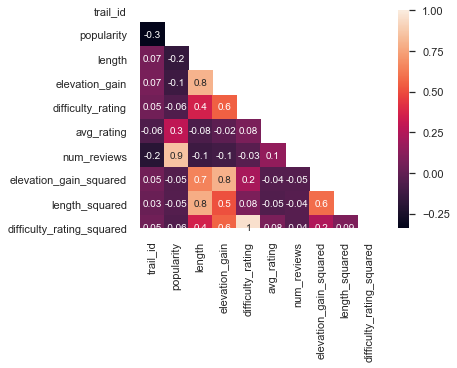

In [297]:

import seaborn as sn
import matplotlib.pyplot as plt
matrix = np.triu(data.corr())
sns.heatmap(data.corr(),annot = True, square=True, vmax=1, fmt='.1g', mask=matrix)
plt.show()


In [282]:
data.corr()

,trail_id,popularity,length,elevation_gain,difficulty_rating,avg_rating,num_reviews,elevation_gain_squared,length_squared,difficulty_rating_squared
trail_id,1.000000,-0.338067,0.066175,0.071352,0.050839,-0.062823,-0.192443,0.051370,0.025899,0.047591
popularity,-0.338067,1.000000,-0.155096,-0.119100,-0.058711,0.290051,0.858392,-0.048472,-0.045011,-0.056812
length,0.066175,-0.155096,1.000000,0.805556,0.357584,-0.075578,-0.119141,0.653132,0.781190,0.357669
elevation_gain,0.071352,-0.119100,0.805556,1.000000,0.551672,-0.017960,-0.098565,0.798183,0.509190,0.561762
difficulty_rating,0.050839,-0.058711,0.357584,0.551672,1.000000,0.077282,-0.034286,0.219113,0.081014,0.963007
avg_rating,-0.062823,0.290051,-0.075578,-0.017960,0.077282,1.000000,0.148374,-0.041868,-0.052197,0.078390
num_reviews,-0.192443,0.858392,-0.119141,-0.098565,-0.034286,0.148374,1.000000,-0.045214,-0.039392,-0.037773
elevation_gain_squared,0.051370,-0.048472,0.653132,0.798183,0.219113,-0.041868,-0.045214,1.000000,0.591319,0.239609
length_squared,0.025899,-0.045011,0.781190,0.509190,0.081014,-0.052197,-0.039392,0.591319,1.000000,0.089396
difficulty_rating_squared,0.047591,-0.056812,0.357669,0.561762,0.963007,0.078390,-0.037773,0.239609,0.089396,1.000000


In [102]:
list(data['area_name'].unique())

['Kenai Fjords National Park',
 'Denali National Park',
 'Glacier Bay National Park',
 'Katmai National Park',
 'Grand Canyon National Park',
 'Saguaro National Park',
 'Petrified Forest National Park',
 'Hot Springs National Park',
 'Yosemite National Park',
 'Sequoia National Park',
 'Joshua Tree National Park',
 'Lassen Volcanic National Park',
 'Kings Canyon National Park',
 'Pinnacles National Park',
 'Death Valley National Park',
 'Redwood National Park',
 'Channel Islands National Park',
 'Rocky Mountain National Park',
 'Great Sand Dunes National Park and Preserve',
 'Mesa Verde National Park',
 'Black Canyon of the Gunnison National Park',
 'Everglades National Park',
 'Fort Pickens National Park',
 'Biscayne National Park',
 'Dry Tortugas National Park',
 'Clayton Co International Park, Jonesboro GA',
 'Indiana Dunes National Park',
 'Mammoth Cave National Park',
 'Acadia National Park',
 'Isle Royale National Park',
 'Voyageurs National Park',
 'Gateway Arch National Park',


In [246]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")
import statsmodels.api as sm
from statsmodels.formula.api import ols

trails_model = ols(formula='popularity~length+num_reviews+difficulty_rating+elevation_gain+difficulty_rating_squared+elevation_gain_squared+length_squared', data=data).fit()
trails_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     1367.
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        15:42:50   Log-Likelihood:                -9394.3
No. Observations:                3313   AIC:                         1.880e+04
Df Residuals:                    3305   BIC:                         1.885e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     7.2223      0.253     28.515      0.000       6.726       7.719
length                    -5.389e-05   7.53e-06     -7.160      0.000   -6.87e-05   -3.91e-05
num_reviews                   0.0375      0.000     94.944      0.000       0.037       0.038
difficulty_rating            -0.2382      0.158     -1.503      0.133      -0.549       0.073
elevation_gain                0.0005      0.000      2.000      0.046    9.62e-06       0.001
difficulty_rating_squared     0.0292      0.022      1.338      0.181      -0.014       0.072
elevation_gain_squared      5.12e-09   2.37e-08      0.216      0.829   -4.14e-08    5.17e-08
length_squared             1.137e-10   2.16e-11      5.278      0.000    7.15e-11    1.56e-10
==============================================================================
Omnibus:                     1612.589   Durbin-Watson:                   0.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108948.943
Skew:                          -1.475   Prob(JB):                         0.00
Kurtosis:                      30.938   Cond. No.                     2.67e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [266]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# sns.set(style="whitegrid")
%matplotlib inline

In [234]:

x=['length','num_reviews', 'difficulty_rating_squared', 'elevation_gain_squared', 'length_squared']

target = data['popularity']
features = data[x]

In [235]:
list(target)

[24.8931,
 18.0311,
 17.7821,
 16.2674,
 12.5935,
 8.8331,
 7.6876,
 5.9038,
 5.8885,
 5.7989999999999995,
 5.6536,
 4.6043,
 4.1956,
 3.958,
 3.8939,
 3.6654,
 3.4891,
 3.3846,
 3.304,
 2.7746,
 2.4937,
 2.33,
 2.0877,
 2.0328,
 1.8986,
 1.86,
 1.8030000000000002,
 1.3701,
 1.3415,
 37.4791,
 36.2709,
 33.256,
 31.6323,
 28.8685,
 28.2035,
 24.0229,
 22.7206,
 22.5006,
 22.1688,
 21.651999999999997,
 20.8545,
 20.0835,
 19.8228,
 18.8699,
 16.7412,
 15.5733,
 15.5,
 14.8144,
 14.7746,
 14.7248,
 14.6866,
 14.3846,
 14.3478,
 13.8468,
 13.3343,
 12.6285,
 12.5954,
 12.4801,
 12.4222,
 12.4044,
 12.392999999999999,
 12.3532,
 12.302,
 12.0834,
 11.8629,
 11.8608,
 11.8001,
 11.7107,
 11.5545,
 11.1051,
 11.0836,
 10.9378,
 10.9165,
 10.8324,
 10.6545,
 10.3784,
 10.3328,
 10.2641,
 10.1704,
 10.0467,
 9.9618,
 9.9197,
 9.7326,
 9.609,
 9.5621,
 9.227,
 9.1802,
 8.7642,
 8.6888,
 8.6324,
 8.6024,
 8.5243,
 8.5202,
 8.4605,
 8.2704,
 8.2646,
 8.2525,
 7.9559,
 7.7075,
 7.7075,
 7.6339,
 7

Text(0, 0.5, 'Predictions')

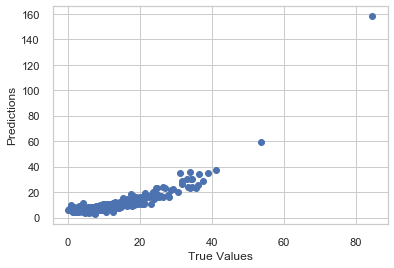

In [298]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [230]:
scaler=StandardScaler()
scaler.fit(features)
scaler.transform(features)

array([[-0.08105001,  1.91567658,  0.97478017,  0.0200671 , -0.11079343],
       [-0.42193794,  1.0302429 , -0.31777404, -0.15439444, -0.1409779 ],
       [-0.57975642,  0.834687  , -0.96405115, -0.19451115, -0.1470667 ],
       ...,
       [-0.68076025, -0.21370994, -0.96405115, -0.19558252, -0.14834435],
       [ 0.064143  , -0.33864843,  0.97478017,  0.2504059 , -0.09086608],
       [-0.36512328, -0.13766042, -0.31777404, -0.15389847, -0.13756418]])

In [236]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.2)


In [237]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (2650, 5) Target:  (2650,)
Test set - Features:  (663, 5) Target:  (663,)


In [238]:
# fit a model
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


In [239]:
print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: 0.7613580305103526


In [240]:
y_train_pred = lm.predict(X_train)

In [241]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
price_std = target.std()


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)
print('Mean Absolute Error in Z-Score:', train_mae/price_std )


Mean Absolute Error: 2.99048592464573
Mean Squared Error: 16.102898746553034
Root Mean Squared Error: 4.012841729566846
Mean Absolute Error in Z-Score: 0.3674572882890251


In [242]:
y_pred = lm.predict(X_test)

In [243]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.6547932101164868


In [244]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Mean Absolute Error  Z:', test_mae/price_std )


Mean Absolute Error:2.982846118831253
Mean Squared Error:21.064372120860863
Root Mean Squared Error:4.589593894982525
Mean Absolute Error  Z: 0.3665185437510534


In [245]:

print('Training: ', (train_rmse), "vs. Testing: ", (test_rmse))

Training:  4.012841729566846 vs. Testing:  4.589593894982525


In [304]:
df=pd.DataFrame(y_pred)

In [306]:
a=df.max()

In [307]:
df.drop(a)

KeyError: '[157.97906264] not found in axis'